## Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

(1797, 64)


<Figure size 640x480 with 0 Axes>

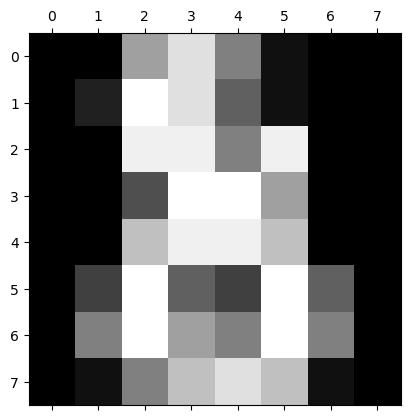

In [2]:
digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[1796])
plt.show()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
# input_target = []
# for i in range(0,1797):
#     input_target.append((digits.images[i],digits.target[i]))

In [5]:
inputs = np.array(digits.images)
targets = np.array(digits.target)

<Figure size 640x480 with 0 Axes>

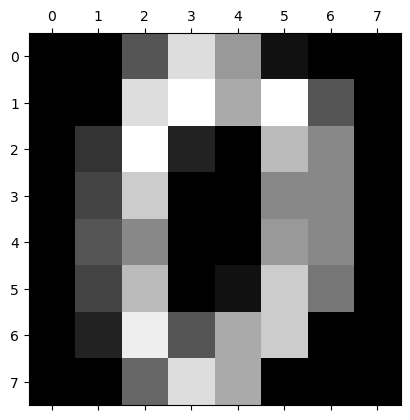

In [6]:
plt.gray()
plt.matshow(inputs[0])
plt.show()

In [7]:
reshaped_inputs = inputs.reshape(1797,64)

In [8]:
reshaped_inputs_f32 = reshaped_inputs.astype('float32')/16

In [9]:
target_array = np.zeros((1797,10))
for i in range(1797):
    target_array[i][targets[i]]=1
target_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
target_array[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
reshaped_inputs_f32.shape

(1797, 64)

In [12]:
input_target = []
for i in range(1797):
    input_target.append((reshaped_inputs_f32[i],target_array[i]))

In [13]:
import random
random.shuffle(input_target)

In [95]:
inputs = []
targets = []
for i in range(1797):
    inputs.append(input_target[i][0])
    targets.append(input_target[i][1])

In [96]:
inputs[0],targets[0]

(array([0.    , 0.    , 0.875 , 0.75  , 0.75  , 0.8125, 0.1875, 0.    ,
        0.    , 0.    , 1.    , 0.5   , 0.5   , 0.375 , 0.0625, 0.    ,
        0.    , 0.    , 0.875 , 0.4375, 0.3125, 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.9375, 0.9375, 1.    , 0.125 , 0.    , 0.    ,
        0.    , 0.    , 0.8125, 0.1875, 0.375 , 0.5   , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.1875, 0.8125, 0.    , 0.    ,
        0.    , 0.    , 0.3125, 0.25  , 0.5   , 0.75  , 0.0625, 0.    ,
        0.    , 0.0625, 0.9375, 0.9375, 0.6875, 0.1875, 0.    , 0.    ],
       dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [114]:
inputs_cp = inputs.copy()
targets_cp = targets.copy()

def  generate_minibatch(inputs_cp=inputs_cp,targets_cp=targets_cp):
    minibatch_input = np.array(inputs_cp[:10])
    minibatch_target = np.array(targets_cp[:10])
    
    del inputs_cp[0:10]
    del targets_cp[0:10]
    print(len(inputs_cp), len(targets_cp), len(minibatch_input), len(minibatch_target))
    
    yield (minibatch_input,minibatch_target)

In [116]:
next(generate_minibatch())

1777 1777 10 10


(array([[0.    , 0.25  , 0.625 , 0.9375, 1.    , 1.    , 0.875 , 0.    ,
         0.    , 0.6875, 1.    , 0.875 , 0.5   , 0.3125, 0.125 , 0.    ,
         0.    , 0.375 , 1.    , 0.5   , 0.    , 0.    , 0.    , 0.    ,
         0.    , 0.    , 0.625 , 0.9375, 0.0625, 0.    , 0.    , 0.    ,
         0.    , 0.    , 0.125 , 1.    , 0.3125, 0.    , 0.    , 0.    ,
         0.    , 0.    , 0.    , 0.8125, 0.625 , 0.    , 0.    , 0.    ,
         0.    , 0.3125, 0.625 , 0.875 , 0.625 , 0.    , 0.    , 0.    ,
         0.    , 0.1875, 1.    , 0.9375, 0.1875, 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.25  , 0.8125, 1.    , 1.    , 0.4375, 0.    ,
         0.    , 0.    , 0.9375, 0.625 , 0.4375, 1.    , 0.0625, 0.    ,
         0.    , 0.4375, 0.75  , 0.    , 0.75  , 0.4375, 0.    , 0.    ,
         0.    , 0.5625, 0.3125, 0.1875, 1.    , 0.125 , 0.    , 0.    ,
         0.    , 0.125 , 0.6875, 1.    , 1.    , 0.75  , 0.4375, 0.    ,
         0.    , 0.3125, 0.625 , 1.    , 0.75  , 0

## 2.2 Sigmoid Function